# Hypothesis testing for Forza Horizon 5 Cars

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/hayyaoe/statistics_AFL2/main/dataset.csv?token=GHSAT0AAAAAACP3TA5GU6QPMZLDGJ6AZWMOZRAX2RQ', delimiter = ',')
df['engine_position'] = df['engine_position'].str.strip()
df['drivetrain'] = df['drivetrain'].str.strip()
df

,model,brand,drivetrain,engine_position,handling,acceleration,braking,horsepower,top_speed,weight,year_of_production
0,911 GT3 RS,Porsche,RWD,Rear,8.5,8.7,9.0,520,310,1350,2022
1,M3,BMW,RWD,Front,8.2,7.8,8.5,480,300,1600,2023
2,911 Turbo S,Porsche,AWD,Rear,8.7,9.0,9.2,640,330,1600,2022
3,DB11,Aston Martin,RWD,Front,8.0,8.5,8.0,600,320,1800,2021
4,Civic Type R,Honda,FWD,Front,8.0,6.5,7.0,320,270,1400,2020
...,...,...,...,...,...,...,...,...,...,...,...
113,Astra VXR,Opel,FWD,Front,7.0,7.5,7.0,276,250,1500,2007
114,Gran Turismo,BMW,RWD,Front,8.0,8.5,8.5,600,330,1700,2022
115,Sierra 1500 AT4,GMC,4WD,Front,6.5,7.0,6.5,355,220,2300,2022
116,AMG GT R,Mercedes-Benz,RWD,Front,8.0,8.0,8.5,577,318,1570,2017


In [21]:
# df['drivetrain'].unique()
def get_t_table(alpha, tail, dof):
  if tail == 2:
    alpha /= 2  
  return st.t.isf([alpha], [dof])[0]

# Data Visualization

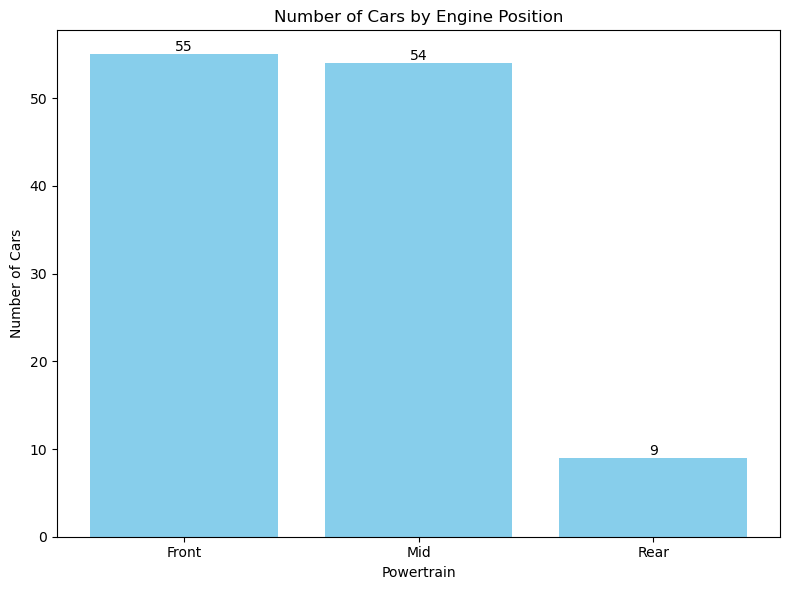

In [22]:
# Count the number of cars for each engine_position
engine_position_counts = df['engine_position'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(engine_position_counts.index, engine_position_counts.values, color='skyblue')
plt.xlabel('Powertrain')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Engine Position')

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


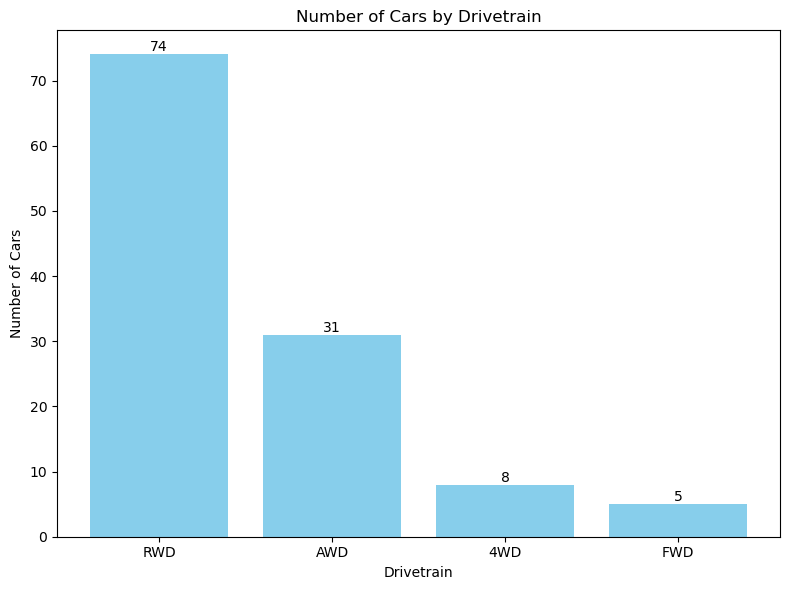

In [23]:
# Count the number of cars for each drivetrain
drivetrain_counts = df['drivetrain'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(drivetrain_counts.index, drivetrain_counts.values, color='skyblue')
plt.xlabel('Drivetrain')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Drivetrain')

# Add count values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

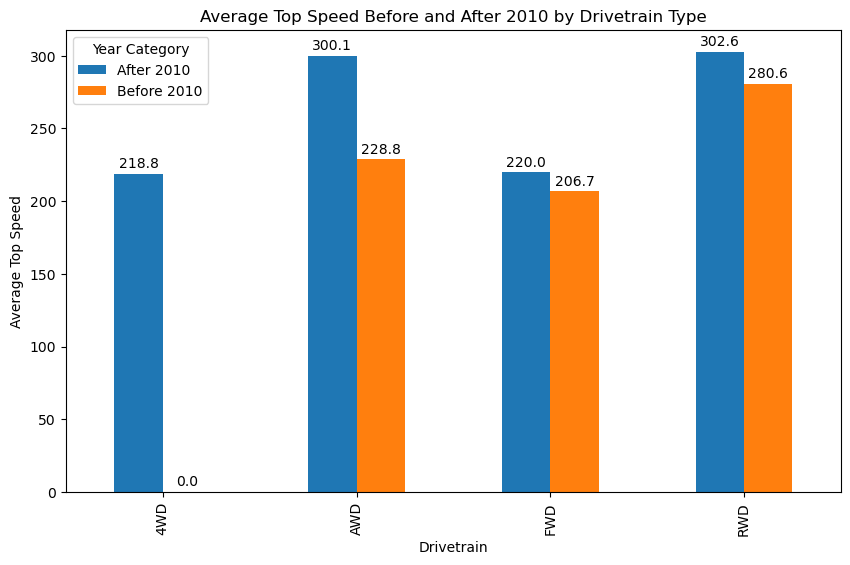

In [24]:
# Convert year_of_production to datetime
df['year_of_production'] = pd.to_datetime(df['year_of_production'], format='%Y')

# Create a column to indicate if the year is before or after 2010
df['year_category'] = df['year_of_production'].apply(lambda x: 'Before 2010' if x.year < 2010 else 'After 2010')

# Bar chart of average top speed before and after 2010, grouped by drivetrain type
plt.figure(figsize=(10, 6))
grouped = df.groupby(['drivetrain', 'year_category'])['top_speed'].mean().unstack()
bars = grouped.plot(kind='bar', ax=plt.gca())
plt.title('Average Top Speed Before and After 2010 by Drivetrain Type')
plt.xlabel('Drivetrain')
plt.ylabel('Average Top Speed')
plt.legend(title='Year Category')

# Add values on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.1f}', ha='center', va='bottom')
plt.show()

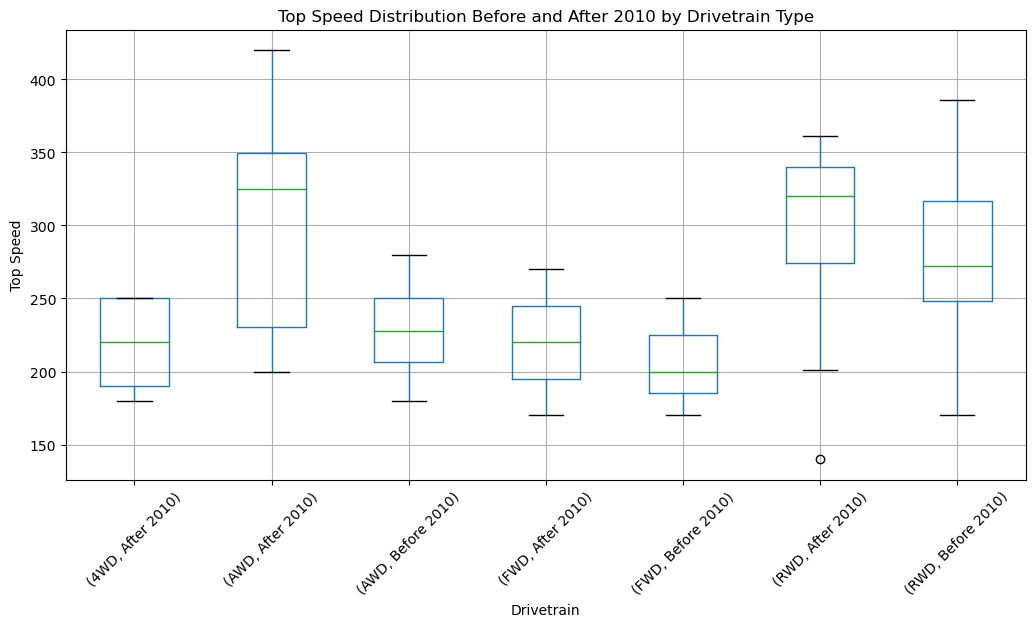

In [25]:
# Boxplot of top speeds by drivetrain type before and after 2010
plt.figure(figsize=(12, 6))
df.boxplot(column='top_speed', by=['drivetrain', 'year_category'], ax=plt.gca())
plt.title('Top Speed Distribution Before and After 2010 by Drivetrain Type')
plt.suptitle('')
plt.xlabel('Drivetrain')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

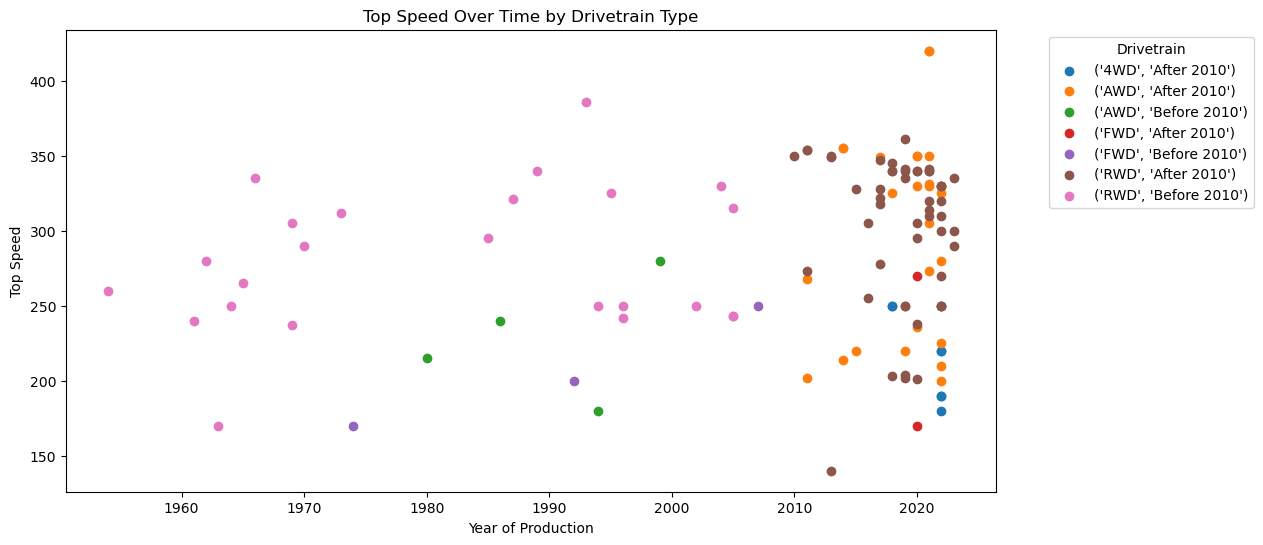

In [26]:
# Scatter plot of top speed vs. year of production, differentiated by drivetrain type and year category
plt.figure(figsize=(12, 6))
for category, group in df.groupby(['drivetrain', 'year_category']):
    plt.scatter(group['year_of_production'], group['top_speed'], label=category)
plt.title('Top Speed Over Time by Drivetrain Type')
plt.xlabel('Year of Production')
plt.ylabel('Top Speed')
plt.legend(title='Drivetrain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# One Sample Hypothesis Testing 

All Wheel Drive Cars have weight bias towards the driven wheels, this improves drive-wheel traction and reduces the tendency for the undriven wheels to dig in. This indicates that the average All Wheel Drive Cars handling is more than 8.0

In [27]:
# Step 1: State null and alternate hypothesis
# H0: Miu_AWD_Handling <= 8.0
# H1: Miu_AWD_Handling > 8.0

# Step 2: Select level of significance
AWDdata = df[df['drivetrain'] == "AWD"]
alpha = 0.05
tail = 1
Miu = 8.0
ddof = 1
Xbar = np.mean(AWDdata['handling'])
n = len(AWDdata)
s = np.std(AWDdata['handling'], ddof = ddof)
dof = n - ddof

# Step 3: Identify the test
# The test used will be the t-test becuase population standard deviation is unknown

# Step 4: Formulate a decision rule
# Reject H0 if  t_count > t_tabel(alpha, dof)

# Step 5: Take a sample, arraive at decision
t_count = (Xbar-Miu) / (s / np.sqrt(n))
t_table = get_t_table(alpha, tail, dof)
print("t_count = {:.2f}".format(t_count))
print("t_tabel = {:.2f}".format(t_table))

# Step 6: Interpret the result
if t_count > t_table:
    print("H0 rejected. Average All-Wheel Drive cars handling is more than 8.0")
else:
    print("Fail to Reject H0. Average All-Wheel Drive cars handling is less than 8.0")


t_count = 5.30
t_tabel = 1.70
H0 rejected. Average All-Wheel Drive cars handling is more than 8.0


Front-Engine All-Wheel Drive (FA) cars have optimal torque distribution providing optimal performance in various conditions, this indicates that the average Front-Engine All-Wheel Drive (FA) Cars acceleration is more than 7.5.

In [28]:
# Step 1: State null and alternate hypothesis
# H0: Miu_FA_Acceleration <= 7.5
# H1: Miu_FA_Acceleration > 7.5

# Step 2: Select level of significance
AWDdata = df[df['drivetrain'] == "AWD"]
FAdata = AWDdata[AWDdata['engine_position'] == "Front"]
alpha = 0.05
tail = 1
ddof = 1
Miu = 7.5
Xbar = np.mean(FAdata['acceleration'])
n = len(FAdata['acceleration'])
s = np.std(FAdata['acceleration'], ddof = ddof)
dof = n - ddof


# Step 3: Identify the test
# The test used will be the t-test becuase population standard deviation is unknown

# Step 4: Formulate a decision rule
# Reject if t_count > t_table(alpha, dof)

# Step 5: Take a sample, arraive at decision
t_count = (Xbar-Miu) / (s / np.sqrt(n))
t_table = get_t_table(alpha, tail, dof)
print("t_count = {:.2f}".format(t_count))
print("t_tabel = {:.2f}".format(t_table))

# Step 6: Interpret the result
if t_count > t_table:
    print("H0 rejected. Average Front-Engine All-Wheel Drive (FA) cars acceleration is more than 7.5")
else:
    print("Fail to Reject H0. Average Front-Engine All-Wheel Drive (FA) cars acceleration is less than 7.5")


t_count = 2.10
t_tabel = 1.86
H0 rejected. Average Front-Engine All-Wheel Drive (FA) cars acceleration is more than 7.5


# Two Sample Hypothesis Testing

All Wheel Drive Cars have better traction than Rear Wheel Drive cars, this indicates that in an acceleration test Rear Wheel Drive Cars have lower acceleration points than All Wheel Drive Cars.

In [29]:
# Step 1: State null and alternate hypothesis
# H0: Miu_RWD_Acceleration >= Miu_AWD_Acceleration
# H1: Miu_RWD_Acceleration < Miu_AWD_Acceleration

# Step 2: Select level of significance
AWD_Acceleration_Data = df[df['drivetrain'] == "AWD"]
RWD_Acceleration_Data = df[df['drivetrain'] == "RWD"]
Xbar_AWD_Acceleration = np.mean(AWD_Acceleration_Data['acceleration'])
Xbar_RWD_Acceleration = np.mean(RWD_Acceleration_Data['acceleration'])
tail = 1
ddof = 1 
alpha = 0.05/tail
n_AWD_Acceleration = len(AWD_Acceleration_Data)
n_RWD_Acceleration = len(RWD_Acceleration_Data)
std_dev_AWD_Acceleration = np.std(AWD_Acceleration_Data['acceleration'], ddof = ddof)
std_dev_RWD_Acceleration = np.std(RWD_Acceleration_Data['acceleration'], ddof = ddof)

dof = n_AWD_Acceleration + n_RWD_Acceleration - 2
pooled_sample_std_dev = ((n_RWD_Acceleration - 1) * np.power(std_dev_RWD_Acceleration,2) + 
                         (n_AWD_Acceleration - 1) * np.power(std_dev_AWD_Acceleration,2)) / dof
print("Standard deviation of the pooled sample = {:.4f}".format(pooled_sample_std_dev))

# Step 3: Identify the test
# Independent Sample
# use t-pooled test
# Because the population standard deviations are unknown but are assumed to be equal

# Step 4: Formulate a decision rule
# Reject H0 if t_calc < -t_table

# Step 5: Take a sample, arraive at decision
t_calc = (Xbar_RWD_Acceleration - Xbar_AWD_Acceleration) / np.sqrt(pooled_sample_std_dev * (1/n_RWD_Acceleration + 1/n_AWD_Acceleration))
t_table = get_t_table(alpha, tail, dof)
print("t_calc = {:.2f}".format(t_calc))
print("t_tabel = {:.2f}".format(t_table))

# # Step 6: Interpret the result
if t_calc < -t_table:
    print("H0 Rejected, Rear Wheel Drive Cars have lower acceleration points than All Wheel Drive Cars")
else: 
    print("Failed to Reject H0, Rear Wheel Drive Cars do not have lower acceleration points than All Wheel Drive Cars")
    


Standard deviation of the pooled sample = 0.4774
t_calc = 0.23
t_tabel = 1.66
Failed to Reject H0, Rear Wheel Drive Cars do not have lower acceleration points than All Wheel Drive Cars


The automotive industry's relentless pursuit of innovation and performance improvement serves as the driving force behind these advancements. Manufacturers are constantly introducing new technologies in engine design, aerodynamics, and materials, leading to cars that are not only faster but also more fuel-efficient and safer than ever before. How significant is the difference between the average car top speed before the year 2010 with the average car top speed after the year 2010. 

In [30]:
# Step 1: State null and alternate hypothesis
# H0: Miu_TopSpeed_Before_2010 == Miu_TopSpeed_After_2010
# H1: Miu_TopSpeed_Before_2010 != Miu_TopSpeed_After_2010

# Step 2: Select level of significance
compare_date = pd.Timestamp('2010-01-01')
car_data_before_2010 = df[df['year_of_production'] <= compare_date]
car_data_after_2010 = df[df['year_of_production'] > compare_date]
Xbar_TopSpeed_Before_2010 = np.mean(car_data_before_2010['top_speed'])
Xbar_TopSpeed_After_2010 = np.mean(car_data_after_2010['top_speed'])
tail = 2
ddof = 1 
alpha = 0.05/tail
n_TopSpeed_Before_2010 = len(car_data_before_2010)
n_TopSpeed_After_2010 = len(car_data_after_2010)
std_dev_TopSpeed_Before_2010 = np.std(car_data_before_2010['top_speed'], ddof = ddof)
std_dev_TopSpeed_After_2010 = np.std(car_data_after_2010['top_speed'], ddof = ddof)

dof = n_TopSpeed_Before_2010 + n_TopSpeed_After_2010 - 2
pooled_sample_std_dev = ((n_TopSpeed_Before_2010 - 1) * np.power(std_dev_TopSpeed_Before_2010,2) + 
                         (n_TopSpeed_After_2010 - 1) * np.power(std_dev_TopSpeed_After_2010,2)) / dof
print("Standard deviation of the pooled sample = {:.4f}".format(pooled_sample_std_dev))

# Step 3: Identify the test
# Independent Sample
# use t-pooled test
# Because the population standard deviations are unknown but are assumed to be equal

# Step 4: Formulate a decision rule
# Reject H0 if |t_calc| > t_table or 
# We could also use t_calc > t_table atau t_calc < -t_table

# Step 5: Take a sample, arraive at decision
t_calc = (Xbar_TopSpeed_Before_2010 - Xbar_TopSpeed_After_2010) / np.sqrt(pooled_sample_std_dev * (1/n_TopSpeed_Before_2010 + 1/n_TopSpeed_After_2010))
t_table = get_t_table(alpha, tail, dof)
print("t_calc = {:.2f}".format(t_calc))
print("t_tabel = {:.2f}".format(t_table))

# Step 6: Interpret the result
if np.abs(t_calc) > t_table:
    print("H0 Rejected. The difference between car top speed before the year 2010 and the year after 2010 is significant.")
else: 
    print("Failed to Reject H0. The difference between car top speed before the year 2010 and the year after 2010 is insignificant.")


Standard deviation of the pooled sample = 3375.0382
t_calc = -1.85
t_tabel = 2.27
Failed to Reject H0. The difference between car top speed before the year 2010 and the year after 2010 is insignificant.
